    ---The depth of the feature maps progressively increases in the network(from 32 to 128), whereas the size of the feature maps decreases (from 148 ×148 to 7 × 7). This is a pattern you’ll see in almost all convnets.

In [1]:
 from tensorflow.keras.datasets import mnist
 (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

## vectorization

In [3]:
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
train_images = train_images.reshape((60000, 28,28,1)) #1 chennel means it is grey scale
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype("float32") / 255
from tensorflow.keras.utils import to_categorical #onehotencoder
test_labels=to_categorical(test_labels)
train_labels=to_categorical(train_labels)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=64) 

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1726 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0476 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0252 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0197 - accuracy: 0.9941


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9888


0.9887999892234802

In [7]:
y_pred=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [8]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [9]:

pred = np.argmax(y_pred,axis=1) #for column axis =1
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:

test_labels = np.argmax(test_labels,axis=1) #for column axis =1
test_labels
#argmax we are taking maximum value of each column

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
confusion = confusion_matrix(test_labels, pred)
confusion

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1132,    0,    1,    0,    0,    2,    0,    0,    0],
       [   2,    2, 1022,    2,    0,    0,    0,    2,    2,    0],
       [   0,    0,    4,  993,    0,   11,    0,    0,    2,    0],
       [   0,    0,    0,    0,  968,    0,    5,    0,    2,    7],
       [   2,    0,    0,    2,    0,  887,    1,    0,    0,    0],
       [   2,    1,    0,    0,    1,    3,  949,    0,    2,    0],
       [   1,    6,    6,    8,    1,    0,    0,  998,    2,    6],
       [   4,    0,    0,    1,    0,    0,    0,    0,  968,    1],
       [   0,    3,    1,    0,    1,    6,    1,    2,    1,  994]],
      dtype=int64)

In [12]:
report = classification_report(test_labels, pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

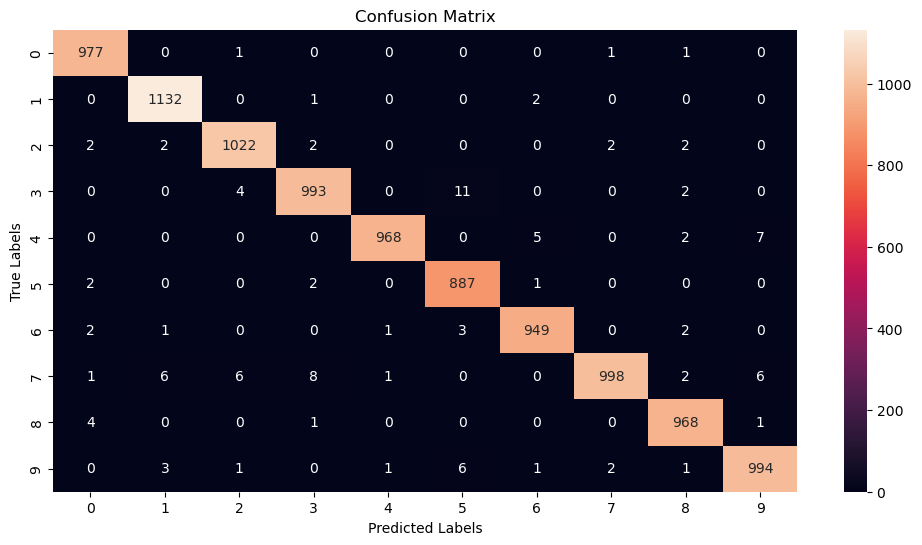

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion, annot=True, fmt='g') #fmt= format ,g=general.. 
#annot=annotations are used to add additional information or labels to specific data points,regions,or features within a graph or chart. 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()